This study showcases an exploratory data analysis of the Google Play Store dataset to discern the trends and insights of the apps obtainable in the store. The chief aim is to determine the key elements that impact the popularity and price of the apps. To accomplish these goals, diverse data analysis techniques and visualization methods were employed.

In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

import folium as fl
import time

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
file_path_df = "https://raw.githubusercontent.com/diogo-costa-silva/assets/main/data/google_play_store/googleplaystore.csv"
file_path_df_reviews = "https://raw.githubusercontent.com/diogo-costa-silva/assets/main/data/google_play_store/googleplaystore_user_reviews.csv"

df = pd.read_csv(file_path_df)
df_reviews = pd.read_csv(file_path_df_reviews)

- App - name of the app - object
- Category - category of the app (games; communication) - object
- Rating - rating of the app - float
- Reviews - number of reviews - object but it must be int
- Size - size of the app (19M, 8.7M) - object (each values has M, k or G according if to the scale of MegaBits, kiloBytes or GigaBytes)
- Installs - number of installations (10,000+, 500,000+) - object but it has to be a better way of handling this variable
- Type - Free or Paid - object
- Price - price of the app - object but it should be float
- Content Rating - object
- Genres - genre of the app - object
- Last Updated - date of the last update - object but it should be date
- Current Ver - current version of the app - object
- Android Ver - minimum version of the android to run the app - object 

In [3]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Data Understanding

In [5]:
df.shape

(10841, 13)

In [6]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### A closer look at categorical columns

In [8]:
df.value_counts("Category")

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
dtype: int64

In [9]:
df.value_counts("Size")

Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
470k                     1
467k                     1
460k                     1
45k                      1
516k                     1
Length: 462, dtype: int64

In [10]:
df.value_counts("Type")

Type
Free    10039
Paid      800
0           1
dtype: int64

In [11]:
df.value_counts("Content Rating")

Content Rating
Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
dtype: int64

In [12]:
df.value_counts("Genres")

Genres
Tools                           842
Entertainment                   623
Education                       549
Medical                         463
Business                        460
                               ... 
Puzzle;Education                  1
Books & Reference;Creativity      1
Role Playing;Education            1
Role Playing;Brain Games          1
February 11, 2018                 1
Length: 120, dtype: int64

In [13]:
df.value_counts("Current Ver")

Current Ver
Varies with device    1459
1.0                    809
1.1                    264
1.2                    178
2.0                    151
                      ... 
2.1.6579                 1
2.1.54                   1
2.1.3181                 1
2.1.3.2                  1
version 0.994            1
Length: 2832, dtype: int64

In [14]:
df.value_counts("Android Ver")

Android Ver
4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
1.0 and up               2
5.0 - 8.0                2
4.0.3 - 7.1.1            2
5.0 - 7.1.1              1
7.0 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
4.1 - 7.1.1              1
dtype: int64

## Data Preparation

At this stage we want to start cleaning our dataset in order to continue the analysis. Some of the questions we will ask ourselves are

- are there any useless or redundant variables?
- are there any duplicate columns?
- does the nomenclature make sense?
- are there any new variables we want to create?

Let’s see how to apply these ideas to our dataset.

In [15]:
df.duplicated().sum()

483

In [16]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [17]:




# Step 1: Convert 'Reviews' to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Step 2: Convert 'Size' to MegaBytes (MB)
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1024  # 1 MB = 1024 kB
    elif 'G' in size:
        return float(size.replace('G', '')) * 1024  # 1 GB = 1024 MB
    else:
        return np.nan  # for 'Varies with device' and other non-numeric values

df['Size'] = df['Size'].map(convert_size)

# Step 3: Clean 'Installs' Column
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '')
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Step 4: Convert 'Price' to float
df['Price'] = df['Price'].str.replace('$', '')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Step 5: Convert 'Last Updated' to datetime
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

# Step 6: Correct '0' value in 'Type' column
df.loc[df['Type'] == '0', 'Type'] = 'Free'

# Step 7: Drop the row with multiple NaN values (where 'Type' was '0')
index_to_drop = df.index[df['Type'] == 'Free'][0]
df.drop(index_to_drop, inplace=True)

# Step 8: Clean 'Genres' column
df['Genres'] = df['Genres'].str.replace('Music & Audio', 'Music')
df['Genres'] = df['Genres'].apply(lambda x: np.nan if 'February 11, 2018' in x else x)
df['Genres'] = df['Genres'].str.split(';')

# Step 9: Create new columns from 'Current Ver' and 'Android Ver'
df['Is_Varied_Version'] = df['Current Ver'].apply(lambda x: 1 if str(x).lower() == 'varies with device' else 0)

def categorize_android_ver(version):
    if pd.isnull(version):
        return np.nan
    if ' and up' in version:
        min_ver = version.split(' and up')[0]
    elif ' - ' in version:
        min_ver = version.split(' - ')[0]
    else:
        return 'Other'
    
    if min_ver < '4.0':
        return 'Below 4.0'
    elif '4.0' <= min_ver < '5.0':
        return '4.0 - 4.9'
    elif '5.0' <= min_ver < '6.0':
        return '5.0 - 5.9'
    elif '6.0' <= min_ver < '7.0':
        return '6.0 - 6.9'
    elif '7.0' <= min_ver < '8.0':
        return '7.0 - 7.9'
    elif '8.0' <= min_ver < '9.0':
        return '8.0 - 8.9'
    else:
        return '9.0 and above'

df['Min_Android_Ver_Category'] = df['Android Ver'].apply(categorize_android_ver)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          9367 non-null   float64       
 3   Reviews         10840 non-null  float64       
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  float64       
 6   Type            10840 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 1.1+ MB


In [19]:
df.loc[df['Type'] == '0']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,NaN,NaN,NaN,0,NaN,NaN,"February 11, 2018",NaT,4.0 and up,NaN


In [20]:
# Find the index of the row where 'Type' was originally '0' and drop it
index_to_drop = df.index[df['Type'] == '0'][0]  # This is where 'Type' was '0' before we changed it to 'Free'
df.drop(index_to_drop, inplace=True)

In [21]:
# Get the unique values in the "Genres" column and their frequency
genres_values = df['Genres'].str.split(';').explode().value_counts()
genres_values


Tools                      843
Education                  761
Entertainment              667
Medical                    463
Business                   460
Productivity               424
Sports                     402
Personalization            392
Communication              388
Lifestyle                  383
Action                     382
Finance                    366
Health & Fitness           343
Photography                335
Social                     295
News & Magazines           283
Casual                     270
Shopping                   260
Travel & Local             258
Arcade                     237
Dating                     234
Books & Reference          234
Simulation                 218
Video Players & Editors    178
Puzzle                     167
Action & Adventure         138
Maps & Navigation          137
Food & Drink               127
Role Playing               123
Racing                     119
Educational                112
Strategy                   111
Adventur

In [22]:
# Merge "Music & Audio" with "Music"
df['Genres'] = df['Genres'].str.replace('Music & Audio', 'Music')

# Replace "February 11, 2018" with NaN
df['Genres'] = df['Genres'].apply(lambda x: np.nan if 'February 11, 2018' in x else x)

# Convert "Genres" to a list of strings
df['Genres'] = df['Genres'].str.split(';')

In [23]:
# For "Current Ver" column, create a new binary column "Is_Varied_Version"
df['Is_Varied_Version'] = df['Current Ver'].apply(lambda x: 1 if str(x).lower() == 'varies with device' else 0)

# For "Android Ver" column, extract the minimum required Android version and categorize them
def categorize_android_ver(version):
    if pd.isnull(version):
        return np.nan
    if ' and up' in version:
        min_ver = version.split(' and up')[0]
    elif ' - ' in version:
        min_ver = version.split(' - ')[0]
    else:
        return 'Other'
    
    # Categorizing Android versions into broader groups based on the minimum required version
    if min_ver < '4.0':
        return 'Below 4.0'
    elif '4.0' <= min_ver < '5.0':
        return '4.0 - 4.9'
    elif '5.0' <= min_ver < '6.0':
        return '5.0 - 5.9'
    elif '6.0' <= min_ver < '7.0':
        return '6.0 - 6.9'
    elif '7.0' <= min_ver < '8.0':
        return '7.0 - 7.9'
    elif '8.0' <= min_ver < '9.0':
        return '8.0 - 8.9'
    else:
        return '9.0 and above'

df['Min_Android_Ver_Category'] = df['Android Ver'].apply(categorize_android_ver)

# Verify the changes
df[['Current Ver', 'Is_Varied_Version', 'Android Ver', 'Min_Android_Ver_Category']].head()


,Current Ver,Is_Varied_Version,Android Ver,Min_Android_Ver_Category
0,1.0.0,0,4.0.3 and up,4.0 - 4.9
1,2.0.0,0,4.0.3 and up,4.0 - 4.9
2,1.2.4,0,4.0.3 and up,4.0 - 4.9
3,Varies with device,1,4.2 and up,4.0 - 4.9
4,1.1,0,4.4 and up,4.0 - 4.9


### Detecting Outliers:
Outliers can be detected using various methods, with the IQR (Interquartile Range) method being one of the most commonly used. The IQR method identifies outliers as values below Q1 - 1.5 × IQR or above Q3 + 1.5 × IQR, where Q1 and Q3 are the first and third quartiles, respectively.

Numerical Columns:
For this dataset, potential numerical columns to check for outliers are:

- Rating
- Reviews
- Size
- Installs
- Price

Steps:

1. Calculate IQR for each numerical column.
2. Identify values that are below Q1 − 1.5 × IQR or above Q3 + 1.5 × IQR.
3. Review identified outliers and decide whether to keep, modify, or remove them.


## Exploratory Data Analysis

In [24]:
df.describe()

,Rating,Reviews,Size,Installs,Price,Is_Varied_Version
count,9366.000000,1.084000e+04,9145.000000,1.084000e+04,10840.000000,10840.000000
mean,4.191757,4.441529e+05,21.516165,1.546434e+07,1.027368,0.134594
std,0.515219,2.927761e+06,22.589084,8.502936e+07,15.949703,0.341305
min,1.000000,0.000000e+00,0.008301,0.000000e+00,0.000000,0.000000
25%,4.000000,3.800000e+01,4.900000,1.000000e+03,0.000000,0.000000
50%,4.300000,2.094000e+03,13.000000,1.000000e+05,0.000000,0.000000
75%,4.500000,5.477550e+04,30.000000,5.000000e+06,0.000000,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000,1.000000


## Data Visualization

### Correlation

In [25]:
df.corr()

,Rating,Reviews,Size,Installs,Price,Is_Varied_Version
Rating,1.000000,0.068141,0.083737,0.051355,-0.021903,0.063403
Reviews,0.068141,1.000000,0.238214,0.643122,-0.009667,0.152031
Size,0.083737,0.238214,1.000000,0.164787,-0.023007,0.031076
Installs,0.051355,0.643122,0.164787,1.000000,-0.011689,0.228593
Price,-0.021903,-0.009667,-0.023007,-0.011689,1.000000,-0.020520
Is_Varied_Version,0.063403,0.152031,0.031076,0.228593,-0.020520,1.000000


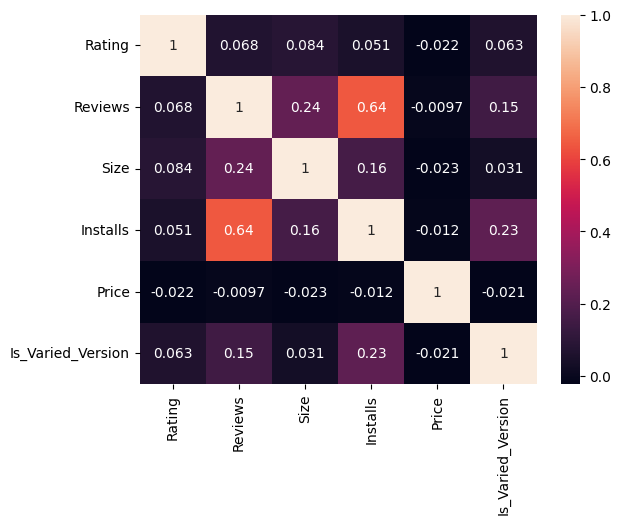

In [26]:
sns.heatmap(df.corr(), annot=True) 
plt.show()

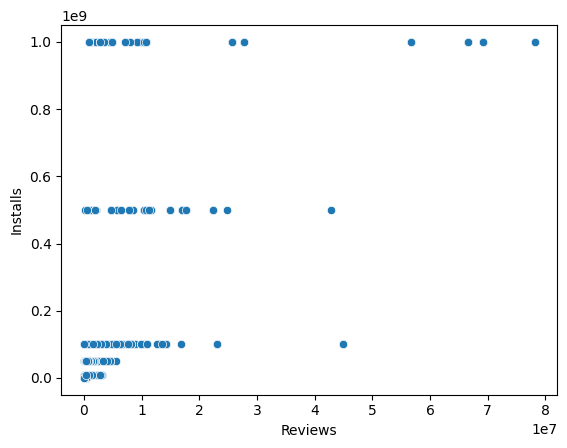

In [27]:
sns.scatterplot(data=df, x="Reviews", y="Installs")
plt.show()

KeyboardInterrupt: 

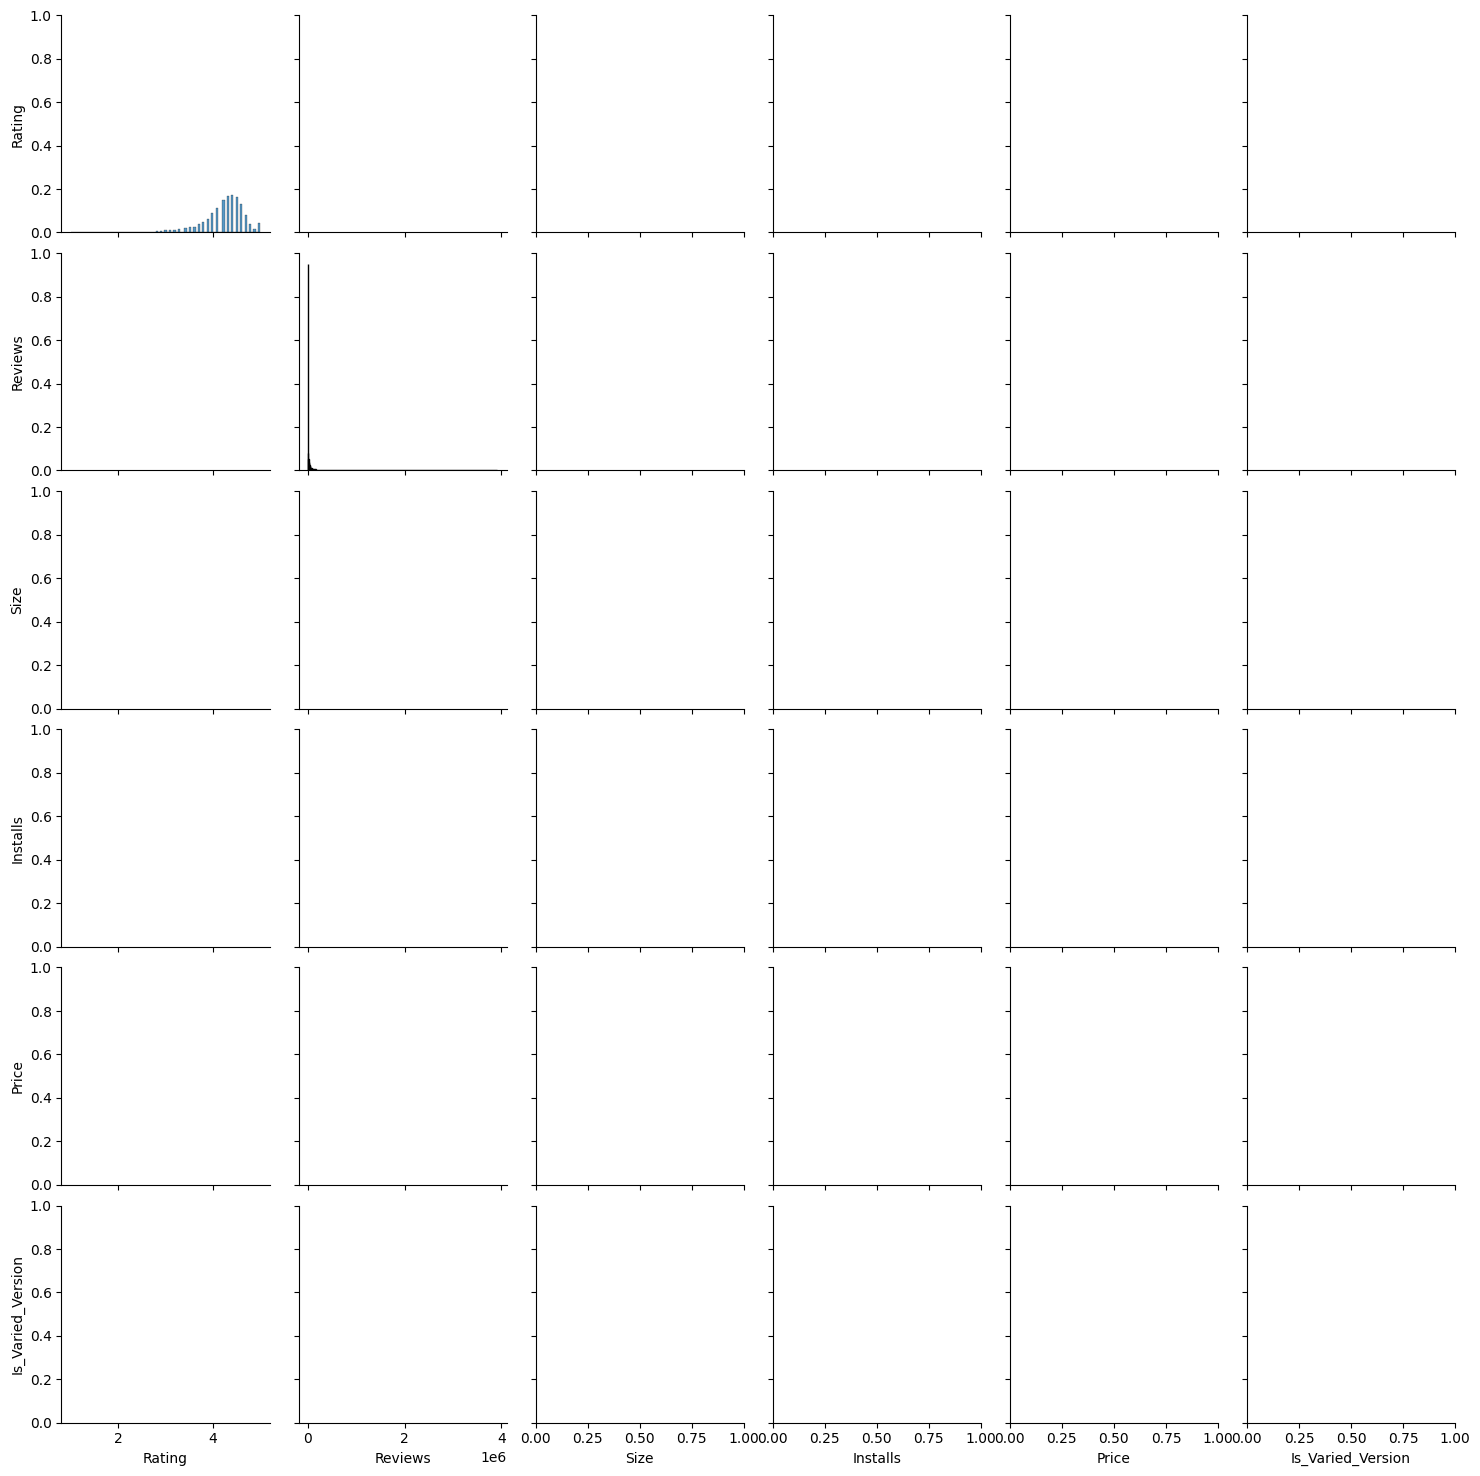

In [28]:
sns.pairplot(data=df)
plt.show()

### Exploring categorical relationships

In [ ]:
sns.histplot(data=df, x="Installs", binwidth=1)
plt.show()